<a href="https://colab.research.google.com/github/PrathamMalhotra21/TED-TALK-VIEWS-PREDICTIONS/blob/main/Pratham_TED_Talk_View_Predicitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - TED Talk View Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member -** - Pratham Malhotra


# **Git Hub Link**

https://github.com/PrathamMalhotra21/TED-TALK-VIEWS-PREDICTIONS

# **Problem Statment**



TED is dedicated to researching and sharing knowledge that matters through short talks and presentations. Our goal is to inform and educate global audiences in an accessible way.


**TED = Technology Entertainment And Design**

TED is an unprofitable organisation that post videos online in Free. TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000+ TED talks including transcripts in many languages. It was basically started as a conference in 1984 that designed by Richard saul wurman but due to some reasons it was unsuccesful. After 6 years in 1990 ,it back with a bang. In TED, speaker share their views and ideas to the society in 18 minutes. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

        Slogan Of TED :- IDEAS WORTH SPREADING



**OBJECTIVE**

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website."

# ***Let Begin***

## ***Know About Data***

In [ ]:
# Import Libaries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import OneHotEncoder # For categorial variable
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF Scores

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Evaaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pratham_Regression_project/data_ted_talks.csv")

In [ ]:
# Dataset Shape
dataset.shape

(4005, 19)

In [ ]:
# Dataset Look
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
# Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
# Check Duplicate value
len(dataset[dataset.duplicated()])

0

In [ ]:
# Defing null value function.
def null_values(df):
  ''' df is DataFrames or Series'''
  null = df.isnull().sum().sort_values(ascending=False)
  print(null)
  print("--"*25)
  print((null/len(df))*100)

# Check Null values
null_values(dataset)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
description         0
url                 0
related_talks       0
topics              0
duration            0
event               0
available_lang      0
native_lang         0
title               0
published_date      0
views               0
speaker_1           0
transcript          0
dtype: int64
--------------------------------------------------
comments          16.354557
occupations       13.033708
about_speakers    12.559301
all_speakers       0.099875
recorded_date      0.024969
talk_id            0.000000
description        0.000000
url                0.000000
related_talks      0.000000
topics             0.000000
duration           0.000000
event              0.000000
available_lang     0.000000
native_lang        0.000000
title              0.000000
published_date     0.000000
views              0.000000
speaker_1          0.000000
transcript    

### ***What do you know about your data?***

So we have given Ted Talk data to predict the number of views on the video. By looking at the dataset, the shape of The dataset is made up of 4005 rows and 19 columns. When it comes to duplicate values, We don't have any, but we do have null values. which are as follows:  
1. In 'comments' you have 655.
2. In 'occupations' you have 522.
3. In 'about_speaker' you have 503.
4. In 'all_speakers' you have 4.
5. In 'recorded_date' you have 1.

Reason of Null value are 
1. In comment is due to talk/vedio has banned the cooment.
2. In occupations,about_speaker,all_speakers,recorded_date is due to human error or information not avilable at time while making dataset.

We will deal null values in feature enginering

Also, The publish_date, recored_date type is Object which is wrong.

## ***Understanding Your Variables***

In [ ]:
# Dataset Describe
dataset.describe([0.90,0.99]).T

,count,mean,std,min,50%,90%,99%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,2333.0,44241.8,60751.60,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,1375508.0,3994610.4,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,89.0,351.1,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,738.0,1133.0,1601.12,3922.0


In [ ]:
# Dataset Columns.
dataset.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Unique values
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  talk_id is 4005 .
No. of unique values in  title is 4005 .
No. of unique values in  speaker_1 is 3274 .
No. of unique values in  all_speakers is 3306 .
No. of unique values in  occupations is 2049 .
No. of unique values in  about_speakers is 2977 .
No. of unique values in  views is 3996 .
No. of unique values in  recorded_date is 1334 .
No. of unique values in  published_date is 2962 .
No. of unique values in  event is 459 .
No. of unique values in  native_lang is 12 .
No. of unique values in  available_lang is 3902 .
No. of unique values in  comments is 601 .
No. of unique values in  duration is 1188 .
No. of unique values in  topics is 3977 .
No. of unique values in  related_talks is 4005 .
No. of unique values in  url is 4005 .
No. of unique values in  description is 4005 .
No. of unique values in  transcript is 4005 .


In [ ]:
# Drop some columns.
columns_drop = ['description','transcript','related_talks','url','talk_id','about_speakers']
uni = dataset.drop(columns = columns_drop, axis =1)

# Unique variables.
for col in uni.columns:
  print(f"Unique value of {col} are {uni[col].unique()}\n")

Unique value of title are ['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']

Unique value of speaker_1 are ['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']

Unique value of all_speakers are ["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]

Unique value of occupations are ["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]

Unique value of views are [ 3523392 14501685  1920832 ...   307187   464414    56582]

Unique value of recorded_date are ['2006-0

***Features Descriptions***
 
* **talk_id :** A unique id for every vedio.
* **title :** The title talk. 
* **speaker_1 :** The speaker of the talk.
* **all_speakers :** The total speaker of the talk.
* **occupations :** The occupations of the speaker.
* **about_speakers :** Information about the speakers.
* **views :** The number of the views.
* **recorded_date :** The date when talk is recored.
* **published_date :** The date when talk is publish.
* **event :** A local gathering where live TED talks happen.
* **native_lang :** Primary Language of the speaker.
* **available_lang :** The language of the talk avilable.
* **comments :** Opinon of the public/community.
* **duration** Lenght of the talk(in sec).
* **topics :** Topics covered in talk.
* **related_talks :** Avialable talk related to its topics.
* **url :** Link of the talk.
* **description :** A breif description of talk.
* **transcript :** A transcript of the talk..

## ***Data Wrangling***

In [ ]:
# Copy the dataset
df = dataset.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
# The Top 10 Most Popular TED Talks
top_tedtalk = df.groupby(['title','speaker_1'])['views'].sum().reset_index().sort_values(by = 'views',ascending=False).head(10)
top_tedtalk

,title,speaker_1,views
844,Do schools kill creativity?,Sir Ken Robinson,65051954
3979,Your body language may shape who you are,Amy Cuddy,57074270
3214,This is what happens when you reply to spam email,James Veitch,56932551
1341,How great leaders inspire action,Simon Sinek,49730580
2943,The power of vulnerability,Brené Brown,47544833
1607,How to speak so that people want to listen,Julian Treasure,41504331
1826,Inside the mind of a master procrastinator,Tim Urban,37976820
1966,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2087,My philosophy for a happy life,Sam Berns,33691484
2890,The next outbreak? We're not ready,Bill Gates,33521780


In [ ]:
# The Top 10 Most Popular Speaker
top_speaker = df.groupby(['speaker_1'])['views'].sum().reset_index().sort_values(by = 'views',ascending=False).head(10)
top_speaker

,speaker_1,views
104,Alex Gendler,117619583
2881,Sir Ken Robinson,84380518
1382,James Veitch,78843641
2875,Simon Sinek,62661183
441,Brené Brown,61285977
404,Bill Gates,57107176
173,Amy Cuddy,57074270
1655,Julian Treasure,54799681
1231,Hans Rosling,39871561
3085,Tim Urban,37976820


In [ ]:
# Top speaker by comment.
top_speaker_comment =  df.groupby(['speaker_1'])['comments'].sum().reset_index().sort_values(by = 'comments',ascending=False).head(10)
top_speaker_comment

,speaker_1,comments
2592,Richard Dawkins,6982.0
2881,Sir Ken Robinson,6869.0
2725,Sam Harris,3957.0
1231,Hans Rosling,3440.0
778,David Chalmers,3006.0
1499,Jill Bolte Taylor,2984.0
441,Brené Brown,2983.0
1873,Lesley Hazleton,2934.0
404,Bill Gates,2846.0
173,Amy Cuddy,2633.0


In [ ]:
# Top 10 speaker with most talk
top_speaker_talk = df['speaker_1'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'Speaker','speaker_1':'Number of talks'}).head(10)
top_speaker_talk

,Speaker,Number of talks
0,Alex Gendler,34
1,Iseult Gillespie,19
2,Emma Bryce,12
3,Daniel Finkel,11
4,Alex Rosenthal,10
5,Hans Rosling,10
6,Juan Enriquez,9
7,Greg Gage,9
8,Chris Anderson,8
9,Dan Ariely,7


In [ ]:
# Creating a new column called Popularity score 
df['Popularity_score'] = ''
df.loc[df['views'] <= 500000, 'Popularity_score'] = 1
df.loc[(df['views'] > 500000) & (df['views'] <= 1500000), 'Popularity_score'] = 2
df.loc[(df['views'] > 1500000) & (df['views'] <= 2500000), 'Popularity_score'] = 3
df.loc[(df['views'] > 2500000) & (df['views'] <= 3500000), 'Popularity_score'] = 4
df.loc[df['views'] > 3500000, 'Popularity_score'] = 5
df["Popularity_score"] = df["Popularity_score"].astype(int)

In [ ]:
# Crating a new columns called talk score
df['talk_score'] = ''
df.loc[df['comments'] <= 50, 'talk_score'] = 1
df.loc[(df['comments'] > 50) & (df['comments'] <= 150),'talk_score'] = 2
df.loc[(df['comments'] > 150) & (df['comments'] <= 250),'talk_score'] = 3
df.loc[(df['comments'] > 250) & (df['comments'] <= 350),'talk_score'] = 4
df.loc[df['comments'] > 350,'talk_score'] = 5
df.loc[df["talk_score"] == "", "talk_score"] = 1
df["talk_score"] = df["talk_score"].astype(int)

In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   talk_id           4005 non-null   int64  
 1   title             4005 non-null   object 
 2   speaker_1         4005 non-null   object 
 3   all_speakers      4001 non-null   object 
 4   occupations       3483 non-null   object 
 5   about_speakers    3502 non-null   object 
 6   views             4005 non-null   int64  
 7   recorded_date     4004 non-null   object 
 8   published_date    4005 non-null   object 
 9   event             4005 non-null   object 
 10  native_lang       4005 non-null   object 
 11  available_lang    4005 non-null   object 
 12  comments          3350 non-null   float64
 13  duration          4005 non-null   int64  
 14  topics            4005 non-null   object 
 15  related_talks     4005 non-null   object 
 16  url               4005 non-null   object 


In [ ]:
# Which is most preferred language
most_lang = df['native_lang'].value_counts().reset_index()
most_lang

,index,native_lang
0,en,3957
1,es,27
2,fr,9
3,ja,3
4,hi,2
5,de,1
6,pt,1
7,ko,1
8,zh-cn,1
9,ar,1


In [ ]:
# Getting Unique langauage
print(df['native_lang'].unique())
print(" ")
# Getting Unique langauage Count
print("Unique native_lang Count is ",df['native_lang'].nunique(),".")

['en' 'fr' 'de' 'pt' 'ko' 'zh-cn' 'ar' 'pt-br' 'es' 'ja' 'it' 'hi']
 
Unique native_lang Count is  12 .


In [ ]:
# Creating a new columns called available_languages
df['available_languages'] = df['available_lang'].apply(lambda x: len(x))
df['available_languages'].head(10).reset_index().sort_values(by = 'available_languages',ascending=False)

,index,available_languages
4,4,387
1,1,303
0,0,270
3,3,219
7,7,207
6,6,195
8,8,195
2,2,165
9,9,129
5,5,123


In [ ]:
# Changing Date type.
df['recorded_date'] = pd.to_datetime(df['recorded_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

# Extracting month and year from publish date
df['published_year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_day'] = df['published_date'].dt.day_name()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   talk_id              4005 non-null   int64         
 1   title                4005 non-null   object        
 2   speaker_1            4005 non-null   object        
 3   all_speakers         4001 non-null   object        
 4   occupations          3483 non-null   object        
 5   about_speakers       3502 non-null   object        
 6   views                4005 non-null   int64         
 7   recorded_date        4004 non-null   datetime64[ns]
 8   published_date       4005 non-null   datetime64[ns]
 9   event                4005 non-null   object        
 10  native_lang          4005 non-null   object        
 11  available_lang       4005 non-null   object        
 12  comments             3350 non-null   float64       
 13  duration             4005 non-nul

In [ ]:
# Top 10 most event ocured.
most_event = df['event'].value_counts().reset_index().head(10).rename(columns={'index' : 'Event', 'event' : 'Number of event'})
most_event

,Event,Number of event
0,TED-Ed,556
1,TED2018,96
2,TED2017,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2016,75
7,TED2013,75
8,TED2015,75
9,TEDGlobal 2012,70


In [ ]:
# Ted event uniuqe
df['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU',
       'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam',
       'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED',
       'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes',
       'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010',
       'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC',
       'TEDxChan

In [ ]:
# Dividing/Filitring TED Events
ted_categories = ['TED-Ed','TEDx', 'TED', 'TEDGlobal', 'TEDSummit', 'TEDWomen', 'TED Residency']
df['TEDEvents'] = df['event'].map(lambda x: "TEDx" if x[0:4] == "TEDx" else x)
df['TEDEvents'] = df['TEDEvents'].map(lambda x: "TED-Ed" if x[0:4] == "TED_Ed" else x)
df['TEDEvents'] = df['TEDEvents'].map(lambda x: "TED" if x[0:4] == "TED2" else x)
df['TEDEvents'] = df['TEDEvents'].map(lambda x: "TEDGlobal" if x[0:4] == "TEDG" else x)
df['TEDEvents'] = df['TEDEvents'].map(lambda x: "TEDWomen" if x[0:4] == "TEDW" else x)
df['TEDEvents'] = df['TEDEvents'].map(lambda x: "TEDSummit" if x[0:4] == "TEDS" else x)
df['TEDEvents'] = df['TEDEvents'].map(lambda x: "TED Residency" if x[0:13] == "TED Residency" else x)
df['TEDEvents'] = df['TEDEvents'].map(lambda x: "Other TED" if x not in ted_categories else x)

In [ ]:
df['duration'].describe([0.90,0.99])

count    4005.000000
mean      724.011236
std       361.775462
min        60.000000
50%       738.000000
90%      1133.000000
99%      1601.120000
max      3922.000000
Name: duration, dtype: float64

In [ ]:
# Let transform duration in sec to minutes
df['duration'] = df['duration']/60
df['duration'].describe([0.90,0.99])

count    4005.000000
mean       12.066854
std         6.029591
min         1.000000
50%        12.300000
90%        18.883333
99%        26.685333
max        65.366667
Name: duration, dtype: float64

In [ ]:
# So ted talk duration can between range of 1min-18min- So 90% of the ted talk in are lies in  that range
# In some case it can goes to an hour which we can see carely

In [ ]:
# ted talk duration greator than 25 min
df[df['duration'] > 25].head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,Popularity_score,talk_score,available_languages,published_year,published_month,published_day,TEDEvents
9,55,My wish: A global day of film,Jehane Noujaim,{0: 'Jehane Noujaim'},{0: ['filmmaker']},{0: 'TED Prize winner Jehane Noujaim is a guts...,460994,2006-02-26,2006-07-25,TED2006,...,https://www.ted.com/talks/jehane_noujaim_my_wi...,Jehane Noujaim unveils her 2006 TED Prize wish...,I can't help but this wish: to think about whe...,1,2,129,2006,7,Tuesday,TED
10,58,My wish: Help me stop pandemics,Larry Brilliant,{0: 'Larry Brilliant'},"{0: ['epidemiologist', 'philanthropist']}","{0: ""TED Prize winner Larry Brilliant has spen...",1265297,2006-02-23,2006-07-25,TED2006,...,https://www.ted.com/talks/larry_brilliant_my_w...,"Accepting the 2006 TED Prize, Dr. Larry Brilli...",I'm the luckiest guy in the world. I got to se...,2,2,168,2006,7,Tuesday,TED
38,56,My wish: Manufactured landscapes and green edu...,Edward Burtynsky,{0: 'Edward Burtynsky'},{0: ['photographer']},"{0: ""2005 TED Prize winner Edward Burtynsky ha...",1301501,2005-02-17,2006-10-31,TED2005,...,https://www.ted.com/talks/edward_burtynsky_my_...,"Accepting his 2005 TED Prize, photographer Edw...","Walk around for four months with three wishes,...",2,2,147,2006,10,Tuesday,TED
39,57,My wish: Three unusual medical inventions,Robert Fischell,{0: 'Robert Fischell'},{0: ['biomedical inventor']},"{0: ""Robert Fischell invented the rechargeable...",521529,2005-02-24,2006-10-31,TED2005,...,https://www.ted.com/talks/robert_fischell_my_w...,"Accepting his 2005 TED Prize, inventor Robert ...",I'm going to discuss with you three of my inve...,2,1,129,2006,10,Tuesday,TED
40,59,My wish: Three actions for Africa,Bono,{0: ' Bono'},"{0: ['musician', 'activist']}","{0: 'Bono, the lead singer of U2, uses his cel...",835982,2005-02-24,2006-10-31,TED2005,...,https://www.ted.com/talks/bono_my_wish_three_a...,Musician and activist Bono accepts the 2005 TE...,"Well, as Alexander Graham Bell famously said o...",2,2,153,2006,10,Tuesday,TED


In [ ]:
# ted talk duration greator than 25 min
print(df[df['duration'] > 25].shape)

(56, 26)


In [ ]:
# dataset related_talks columns
df['related_talks'].iloc[0]

'{243: \'New thinking on the climate crisis\', 547: \'The business logic of sustainability\', 2093: \'The state of the climate — and what we might do about it\', 54715: \'How we can turn the tide on climate\', 29968: \'The most important thing you can do to fight climate change: talk about it\', 2339: "Climate change is happening. Here\'s how we adapt"}'

### What all manipulations have you done and insights you found?

**The Top 10 Most Popular TED Talks**


* **Ken Robinson's** talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with **65.05 million views.**
* Robinson's talk is closely followed by **Amy Cuddy's** talk on Your Body Language May Shape Who You Are.
* There are only **3 talks** that have **surpassed the 50 million mark** and **12 talks that have crossed the 30 million mark.**

**The Top 10 Most Popular Speaker**

* The most popular speaker is Alex Gendler with over 1Billion views. Follwed by
**Sir Ken Robinsion.**
* Also there are toatl **8 speakers** are in both popular ted talk and popular speaker.
* This observation raise a question is that **"Does speaker have done more talks than others?"**

**Does speaker have done more talks than others?**
* Yes,Speaker has done more talks.
* **Alex Gendler** has done most **34 talk** which is the highest.
* There are total **6 speakers** which have done **10 or more talks.**

**Top Speaker By Comment**

* **Richard Dawkin** is the most popular speaker by comment which has more than **6000 comments.**
* In top 10 most popular speakers by views and comments there are total **6 speakers** are same in both categories.




**Creating a new Columns**
* So i am creating new columns which are Populaarity_score and Talk_score.
* **Populaarity_score** is based on number of views in which tell us about how popular our talk in the communnity.
* **Talk_score** is based on number of comments in which tell us about the quality of talk in the community and also tell us like and dislike.
* Score is range from 1 to 5 which are as follow :

  * 1 means you didn’t enjoy it at all and would not recommend it to others.
  * 2 means you didn’t enjoy it but might recommend it to others.
  * 3 means you enjoyed it, but it wasn’t your favorite.
  * 4 means you really enjoyed it and would recommend it to others.
  * 5 means you loved it and would definitely recommend it to others.


**Most Popular Langauage**
* When it comes to most popular langauage **English** is an the top
* Talk had happen in **12 unique** langauage.
* Also, later on talk translated to other language to.



**Talk Duration**
* TED is famous for imposing a very strict time limit of **18 minutes**. Although this is the suggested limit, there have been talks as short as 1 minutes and some have stretched to as long as 24 minutes.

* TED Talks, on average are **12 minutes** long. I find this surprising because TED Talks are often synonymous with 18 minutes and the average is a good 2 minutes shorter than that.

* The shortest TED Talk on record is **1 minutes** long whereas the longest talk is **65.4 minutes*8 long. I'm pretty sure the longest talk was not actually a TED Talk. Let us look at both the shortest and the longest talk.


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **The Top 10 Most Popular TED Talks**

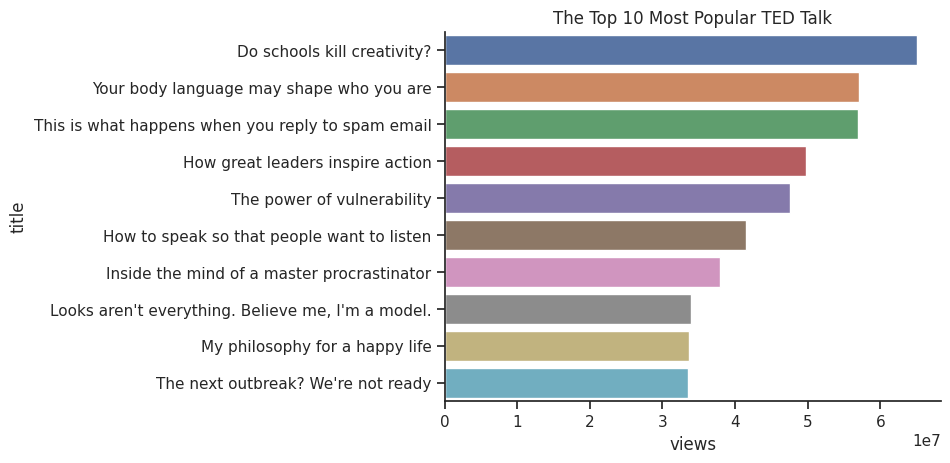

In [ ]:
# Chart
top_tedtalk
# Set style
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "--"})
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
# Code for chart
sns.barplot(y="title",x='views',data=top_tedtalk)
plt.title("The Top 10 Most Popular TED Talk")
plt.show()

### **The Top 10 Most Popular Speaker**

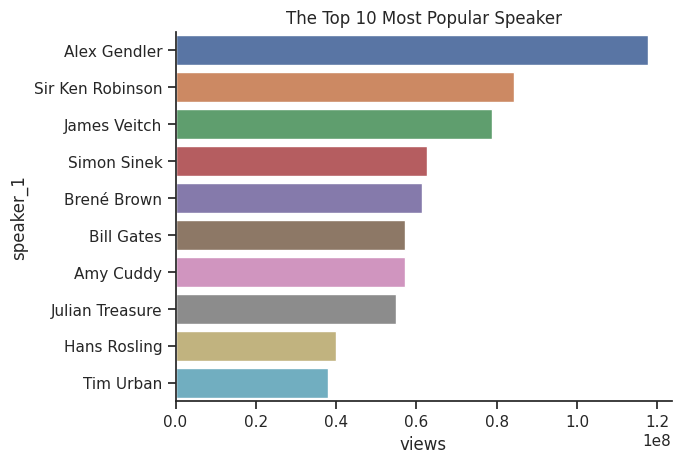

In [ ]:
# Chart
top_speaker
sns.barplot(y="speaker_1",x='views',data=top_speaker)
plt.title("The Top 10 Most Popular Speaker")
plt.show()

### **Top speaker by comment.**

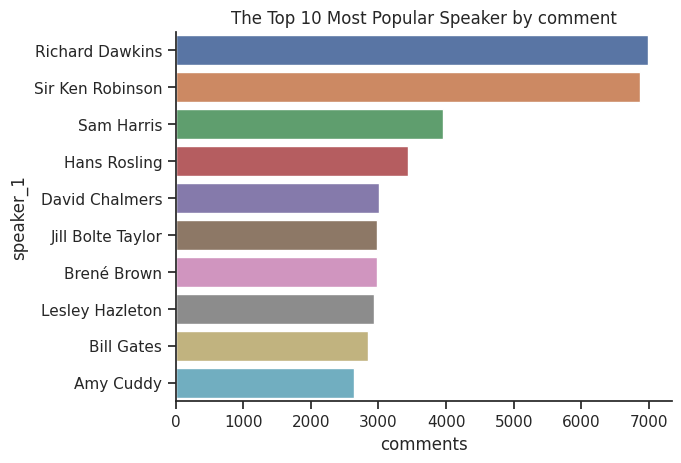

In [ ]:
# Chart
sns.barplot(y="speaker_1",x='comments',data=top_speaker_comment)
plt.title("The Top 10 Most Popular Speaker by comment")
plt.show()

### **The Top 10 speaker with most talk**

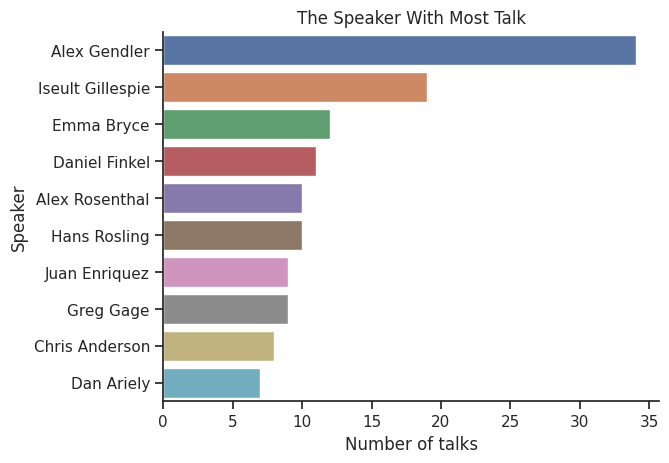

In [ ]:
# Chart
top_speaker_talk
sns.barplot(x="Number of talks",y='Speaker',data=top_speaker_talk)
plt.title("The Speaker With Most Talk")
plt.show()

### **Popularity and talk score**

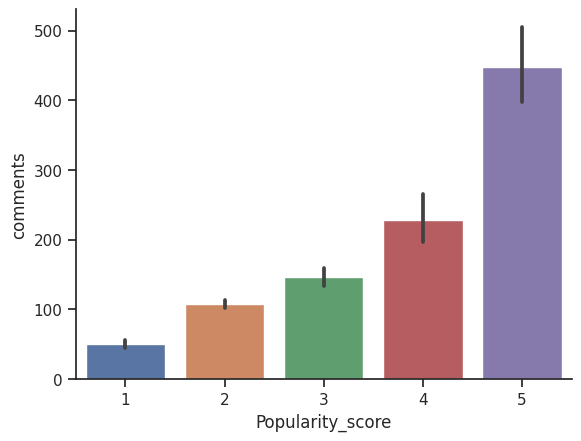

In [ ]:
# Chart
sns.barplot(x="Popularity_score",y="comments",data=df)
plt.show()

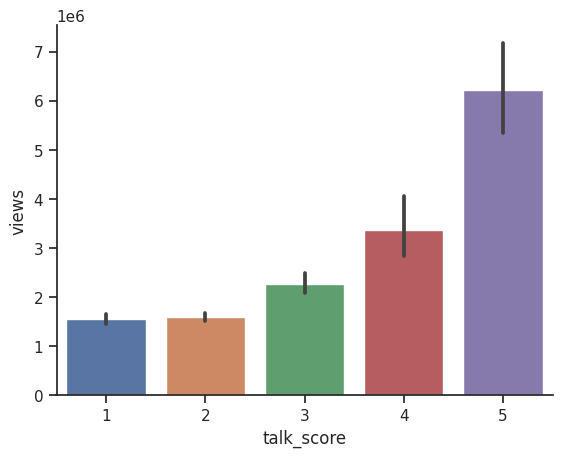

In [ ]:
# Chart
sns.barplot(x="talk_score",y="views",data=df)
plt.show()

**Observation**
* On the above observation we can see an strong correaltion bewtween views and comments. As Comment increase views also increase.
* we can say that the number of views for a TED Talk video is also predictable in certain scenarios.
*  There are no other good columns available in the dataset that can be modified or used to create new columns for better prediction models.

### **The Top Events in TED Talk**

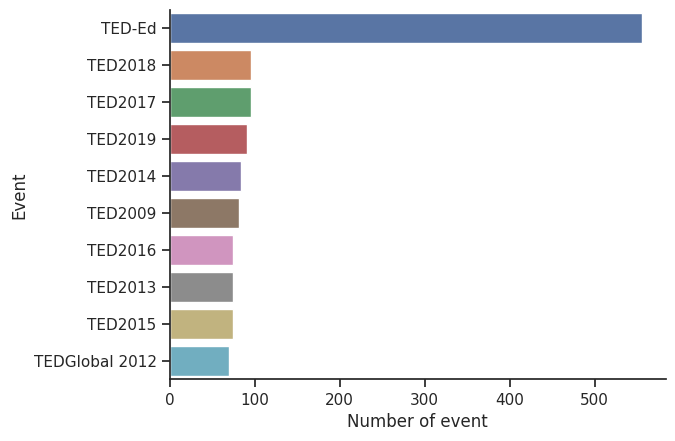

In [ ]:
# Chart
sns.barplot(y='Event',x='Number of event',data=most_event)
plt.show()

### **Number of Talk in a Day/Month/Year**

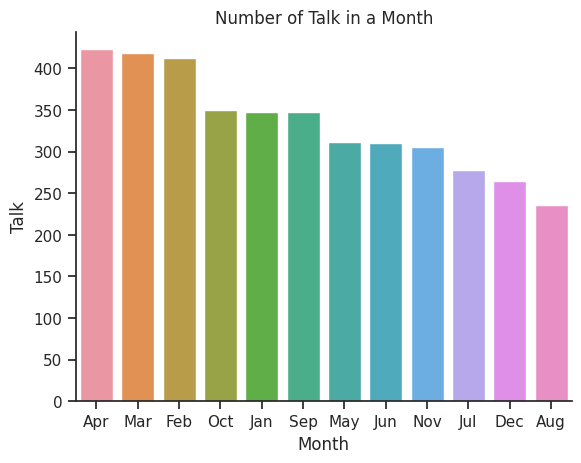

In [ ]:
# Counting the number of talks in a month
month_df = df['published_month'].value_counts().reset_index()
month_df.rename(columns={'index' : 'Month', 'published_month' : 'Talk'},inplace=True)
import calendar
month_df['Month'] = month_df['Month'].apply(lambda x : calendar.month_abbr[x])
# Chart
sns.barplot(data=month_df,x='Month',y='Talk')
plt.title("Number of Talk in a Month")
plt.show()

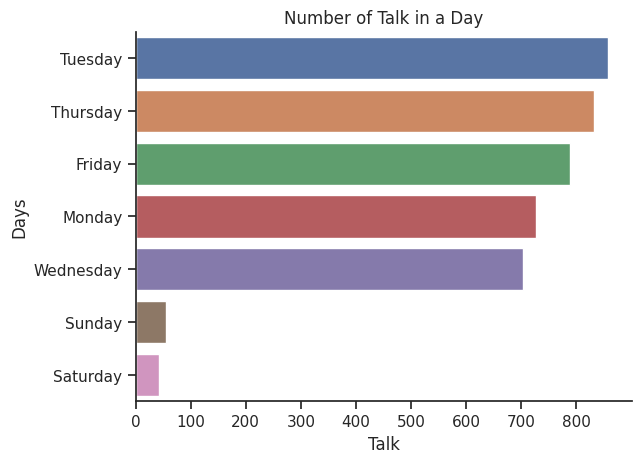

In [ ]:
# Counting the number of days and talk
day_df = df['published_day'].value_counts().reset_index()
day_df.rename(columns={'index' : 'Days', 'published_day' : 'Talk'},inplace=True)

# Chart
sns.barplot(x='Talk',y='Days',data=day_df)
plt.title("Number of Talk in a Day")
plt.show()

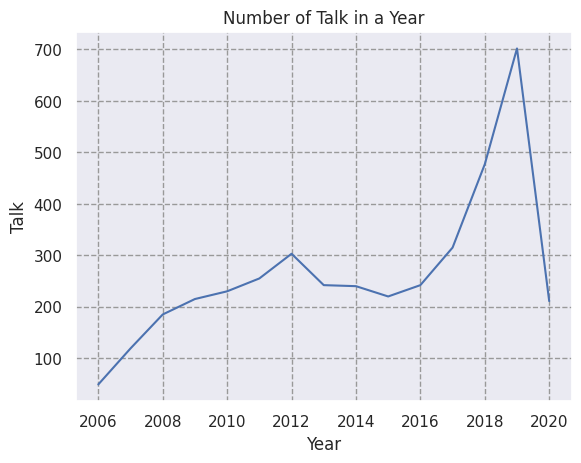

In [ ]:
# Counting the number of year and talk
year_df = df['published_year'].value_counts().reset_index()
year_df.rename(columns={'index' : 'Year', 'published_year' : 'Talk'},inplace=True)

# Set style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "--"})
# Chart
sns.lineplot(x='Year',y='Talk',data=year_df)
plt.title("Number of Talk in a Year")
plt.show()

**Observation**
* **April** is clearly the **most popular** month for TED Talk. Where as **August and December** are the least popular month.
* **Tuesday** is clearly the **most popular** day for TED Talk. Where as **Sunday and Staturday** are the least popular day.
* When it comes to the Talk over the year it sharply increase reaches to its peak in 2018 but suddleny fell in 2019 and 2020 due to pandemic.
* It seems like no Ted Talk happen/published in 2019. 

### **Features Distrbution**

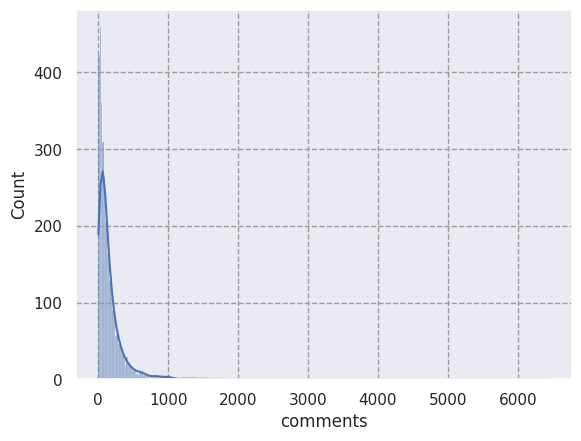

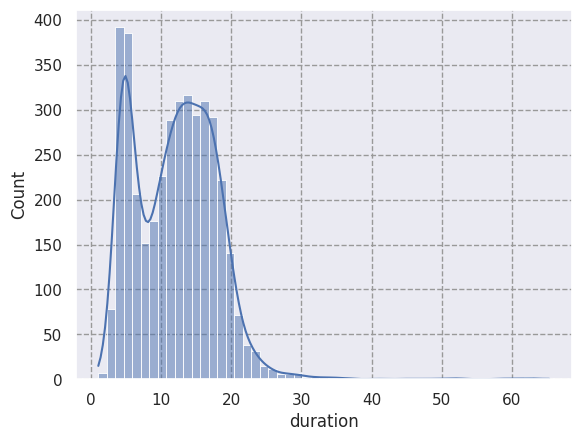

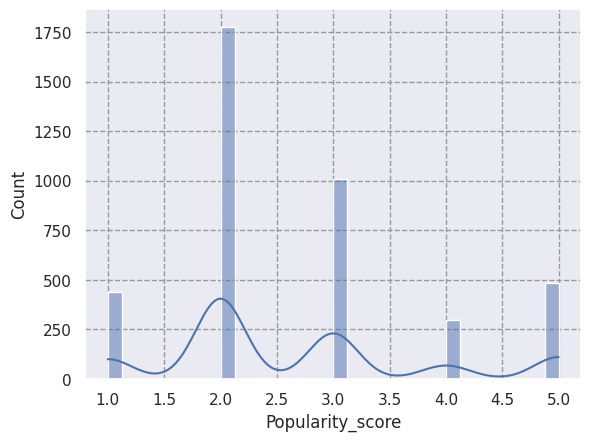

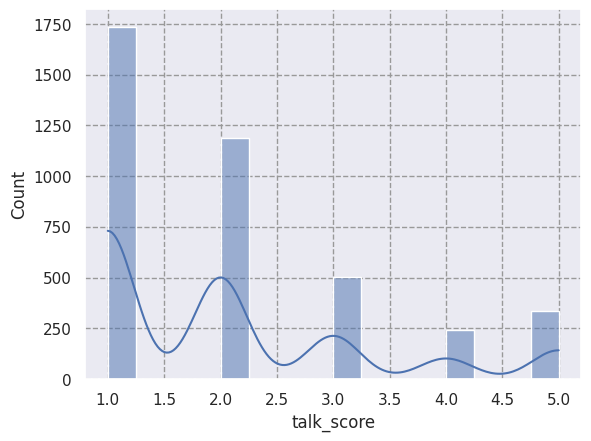

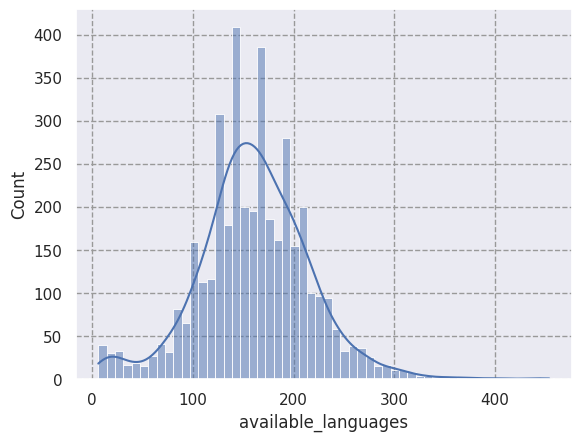

In [ ]:
# Features
Features = ['comments', 'duration', 'Popularity_score','talk_score', 'available_languages']

# Chart
for i in Features:
  sns.histplot(df[i],kde=True)
  plt.show()

### **Target Variable**

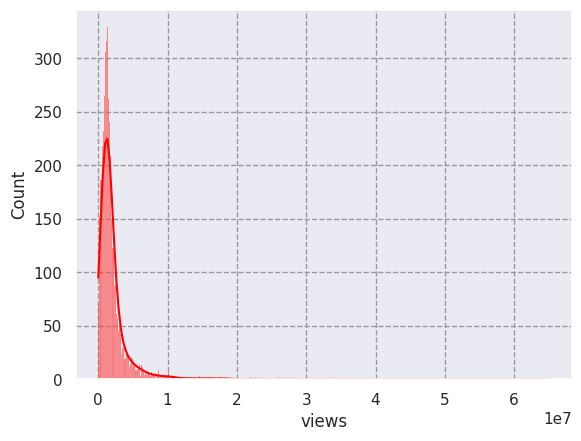

In [ ]:
# Chart
sns.histplot(df.views,color='red',kde=True)
plt.show()

### **Independent and Features Relationship**

<Axes: xlabel='comments', ylabel='views'>

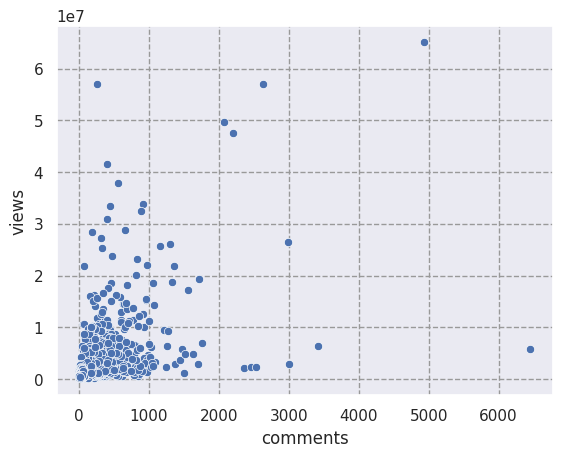

In [ ]:
# Chart
Features = ['comments', 'duration', 'Popularity_score', 'available_languages','talk_score']
sns.scatterplot(y=df['views'],x=df['comments'])

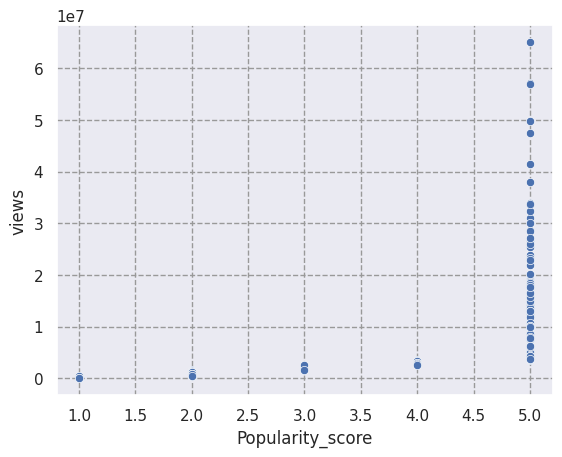

In [ ]:
# Chart
sns.scatterplot(y=df['views'],x=df['Popularity_score'])
plt.show()

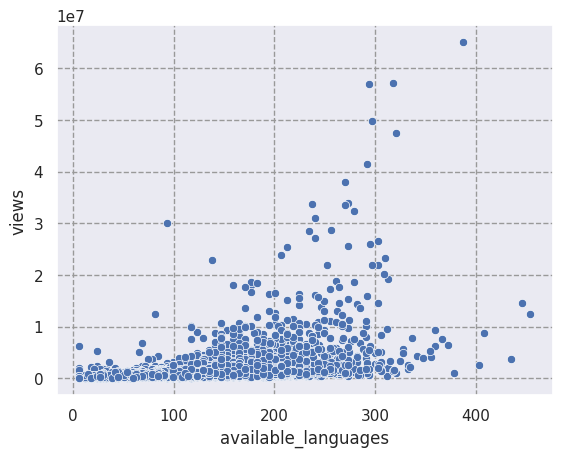

In [ ]:
# Chart
sns.scatterplot(y=df['views'],x=df['available_languages'])
plt.show()

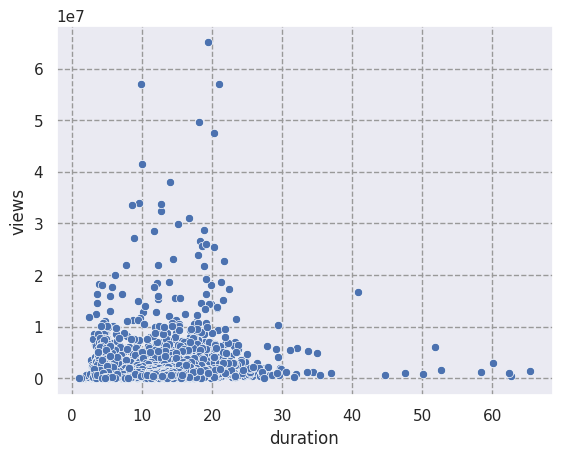

In [ ]:
# Chart
sns.scatterplot(y=df['views'],x=df['duration'])
plt.show()

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

## ***Feature Engineering & Data Pre-processing***

### Handling Missing Values

In [ ]:
# Check for null vlaues
null_values(df)

comments               655
occupations            522
about_speakers         503
all_speakers             4
recorded_date            1
talk_id                  0
url                      0
published_day            0
published_month          0
published_year           0
available_languages      0
talk_score               0
Popularity_score         0
transcript               0
description              0
duration                 0
related_talks            0
topics                   0
title                    0
available_lang           0
native_lang              0
event                    0
published_date           0
views                    0
speaker_1                0
TEDEvents                0
dtype: int64
--------------------------------------------------
comments               16.354557
occupations            13.033708
about_speakers         12.559301
all_speakers            0.099875
recorded_date           0.024969
talk_id                 0.000000
url                     0.000000
pub

In [ ]:
# Missing in comments
pd.set_option('display.max_columns', None)
df[df['comments'].isnull()].head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,Popularity_score,talk_score,available_languages,published_year,published_month,published_day,TEDEvents
1062,1323,"""Women of Hope""",Morley,{0: ' Morley'},{0: ['singer-songwriter']},"{0: 'Recording artist, singer, and composer Mo...",365088,2011-12-01,2012-01-13,TEDxWomen 2011,en,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",NaN,5.500000,"['TEDx', 'activism', 'music', 'poetry', 'women...","{823: 'Singing old poems to life', 1068: 'Poem...",https://www.ted.com/talks/morley_women_of_hope/,"Inspired by Aung San Suu Kyi's call to action,...",(Music) ♫ They stood together ♫ ♫ under a tree...,1,1,234,2012,1,Friday,TEDx
1730,2041,"Want to innovate? Become a ""now-ist""",Joi Ito,{0: 'Joi Ito'},{0: ['relentless mind']},{0: 'Joi Ito is the former director of the MIT...,2314973,2014-03-14,2014-07-07,TED2014,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",NaN,12.516667,"['creativity', 'innovation', 'investment', 'sc...","{63: 'The era of open innovation', 1065: 'We a...",https://www.ted.com/talks/joi_ito_want_to_inno...,"""Remember before the internet?"" asks Joi Ito. ...","On March 10, 2011, I was in Cambridge at the M...",3,1,166,2014,7,Monday,TED
2478,2750,"The unexpected math behind Van Gogh's ""Starry ...",Natalya St. Clair,{0: 'Natalya St. Clair'},NaN,NaN,7579109,2014-10-30,2017-09-07,TED-Ed,en,"['ar', 'bg', 'el', 'en', 'es', 'fa', 'fr', 'he...",NaN,4.383333,"['TED-Ed', 'art', 'math', 'painting', 'culture...","{28418: 'Who decides what art means? ', 38337:...",https://www.ted.com/talks/natalya_st_clair_the...,"Physicist Werner Heisenberg said, ""When I meet...",One of the most remarkable aspects of the huma...,5,1,171,2017,9,Thursday,TED-Ed
2479,2763,"The physics of the ""hardest move"" in ballet",Arleen Sugano,{0: 'Arleen Sugano'},NaN,NaN,2300299,2016-03-22,2017-09-07,TED-Ed,en,"['ar', 'bg', 'de', 'en', 'es', 'fa', 'fr', 'he...",NaN,4.266667,"['TED-Ed', 'dance', 'physics', 'science and ar...",{2602: 'Ballroom dance that breaks gender role...,https://www.ted.com/talks/arleen_sugano_the_ph...,"In the third act of ""Swan Lake"", the Black Swa...","In the third act of ""Swan Lake,"" the Black Swa...",3,1,141,2017,9,Thursday,TED-Ed
2480,2760,The ethical dilemma of self-driving cars,Patrick Lin,{0: 'Patrick Lin'},NaN,NaN,1159529,2015-12-08,2017-09-07,TED-Ed,en,"['ar', 'de', 'el', 'en', 'es', 'fa', 'fr', 'he...",NaN,4.250000,"['TED-Ed', 'driverless cars', 'cars', 'moralit...",{2609: 'What a driverless world could look lik...,https://www.ted.com/talks/patrick_lin_the_ethi...,Self-driving cars are already cruising the str...,This is a thought experiment. Let's say at som...,2,1,141,2017,9,Thursday,TED-Ed


In [ ]:
# Does comments have zeros
df[df['comments'] == 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,Popularity_score,talk_score,available_languages,published_year,published_month,published_day,TEDEvents
3893,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,3.550000,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,https://www.ted.com/talks/jon_gray_the_power_o...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,...",1,1,30,2020,2,Monday,Other TED
3898,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,3.383333,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",https://www.ted.com/talks/yves_behar_how_surfb...,Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...,1,1,39,2020,2,Tuesday,Other TED


In [ ]:
# Filling the missing values
missing_values = {'comments':0, 'occupations':'no data', 'about_speakers': 'no data', 'all_speakers' : 'no data'}
df.fillna(value=missing_values,inplace=True)

# Check missing values
null_values(df)

recorded_date          1
talk_id                0
topics                 0
published_day          0
published_month        0
published_year         0
available_languages    0
talk_score             0
Popularity_score       0
transcript             0
description            0
url                    0
related_talks          0
duration               0
title                  0
comments               0
available_lang         0
native_lang            0
event                  0
published_date         0
views                  0
about_speakers         0
occupations            0
all_speakers           0
speaker_1              0
TEDEvents              0
dtype: int64
--------------------------------------------------
recorded_date          0.024969
talk_id                0.000000
topics                 0.000000
published_day          0.000000
published_month        0.000000
published_year         0.000000
available_languages    0.000000
talk_score             0.000000
Popularity_score       0.00000

**Observation**
* Comment has 655 missing. Also minimum value in comment is zero.SO we are goona fill missing value with zero.
* And for others missing we dont have any data. So we are filling values with "no data"
* We are gona ignore the missing value in record_date because it not much useful in predictions.

### **Handling Outliers**

In [ ]:
# Function to plot boxplot and histplot together
def box_hist_plot(df,features):
  plt.figure(figsize=(10,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=df[features])
  fig.set_title('')
  fig.set_ylabel(features)
    
  plt.subplot(1, 2, 2)
  fig = sns.histplot(df[features].dropna(),kde=True)
  plt.show()

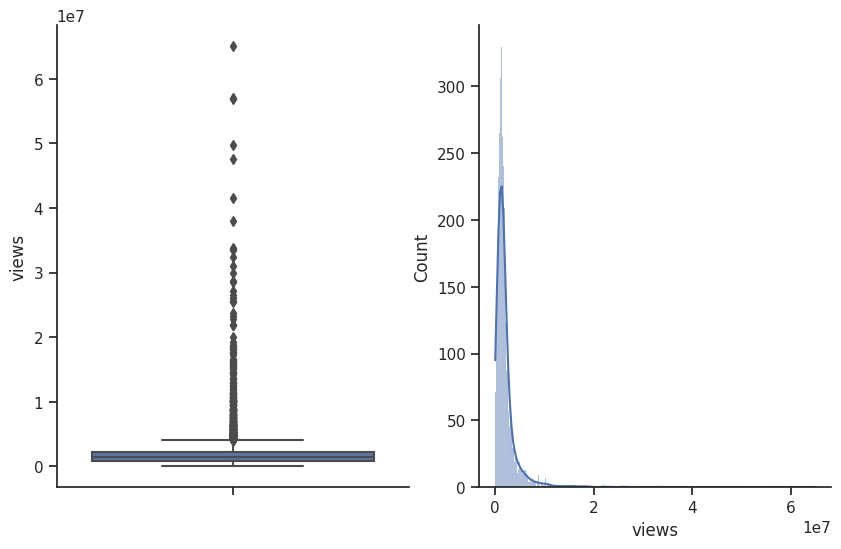

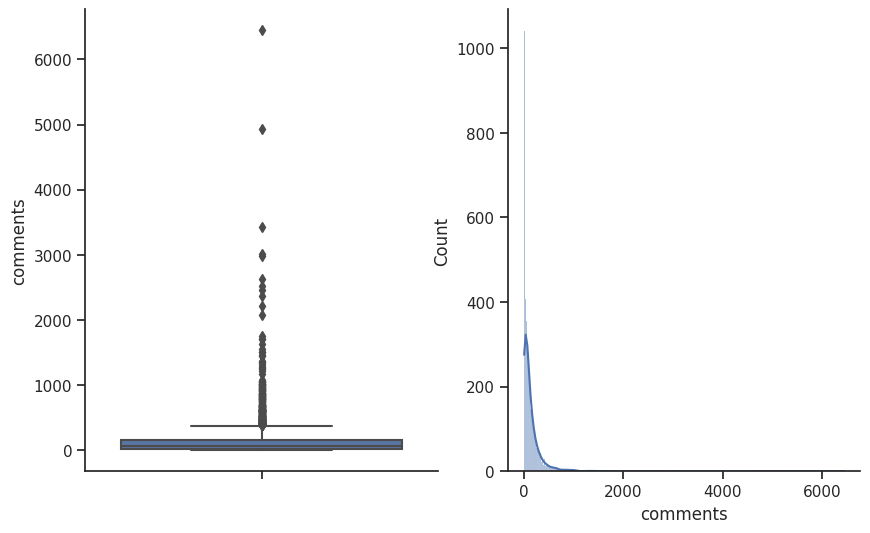

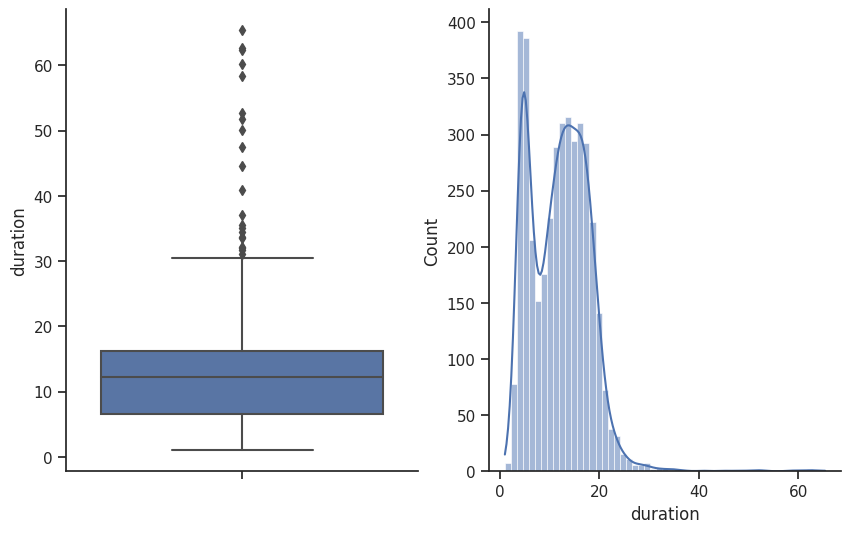

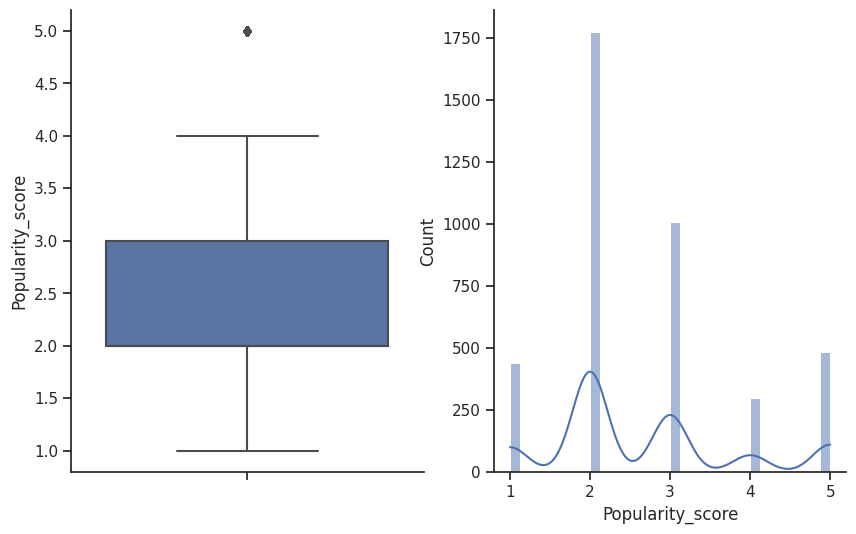

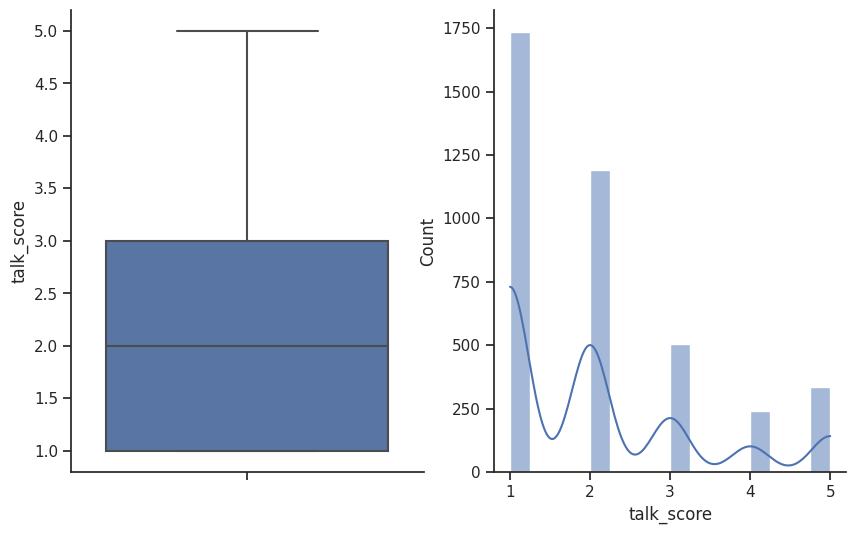

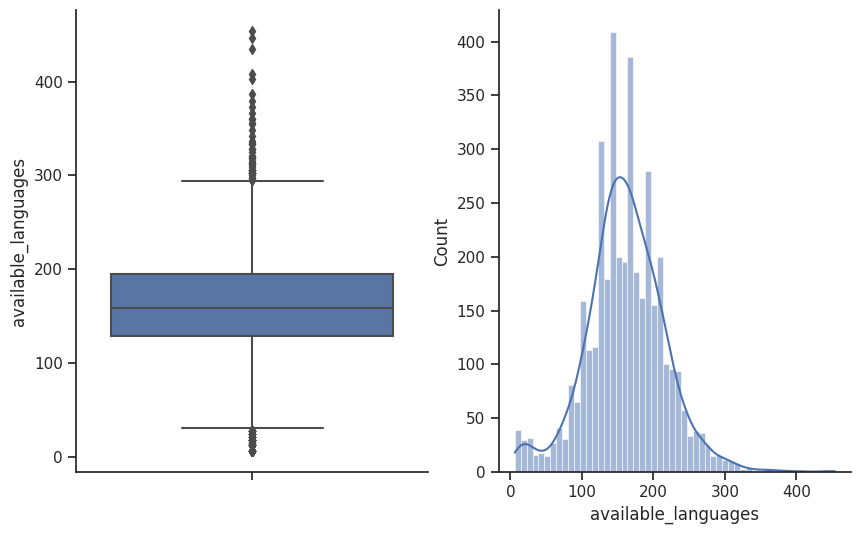

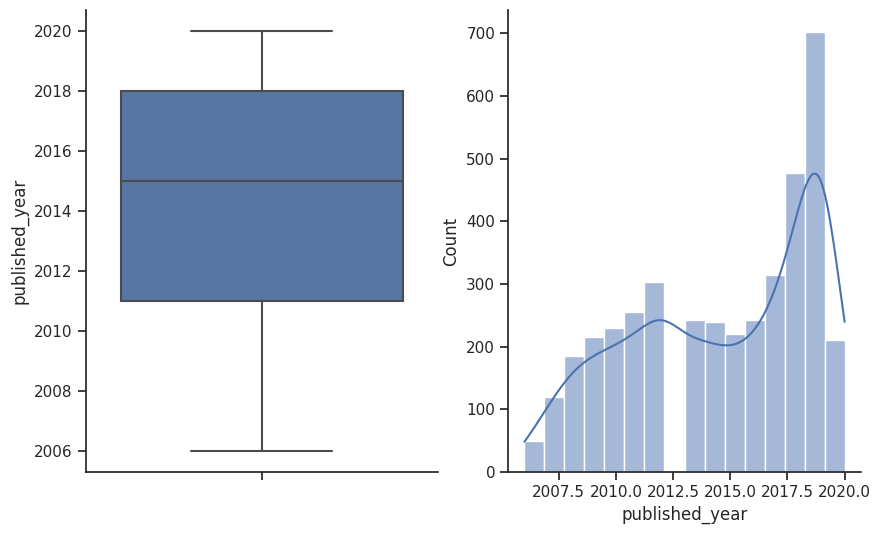

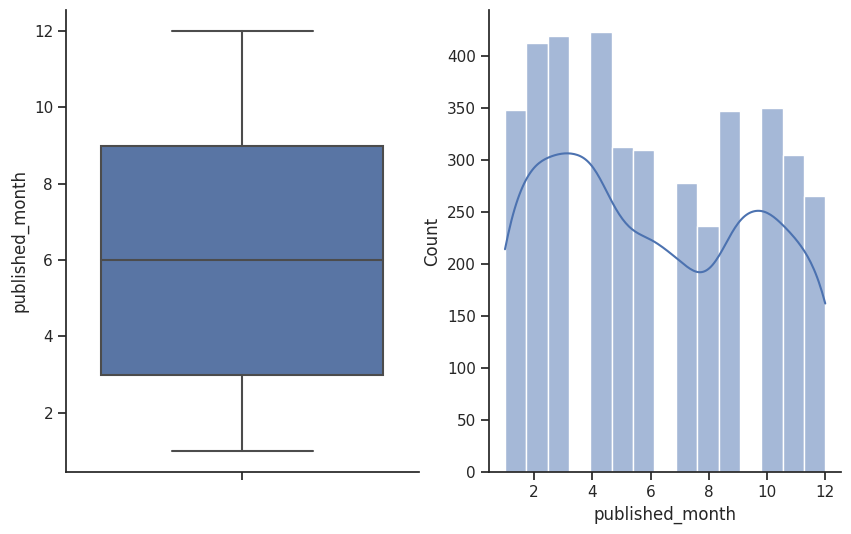

In [ ]:
# Check for outliers
for i in [i for i in df.describe().columns if i not in 'talk_id' ]:
  box_hist_plot(df,i)

In [ ]:
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

# Restricting the data to lower and upper boundry
outliers = ['available_languages','views','comments','duration']
for feature in outliers:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]  

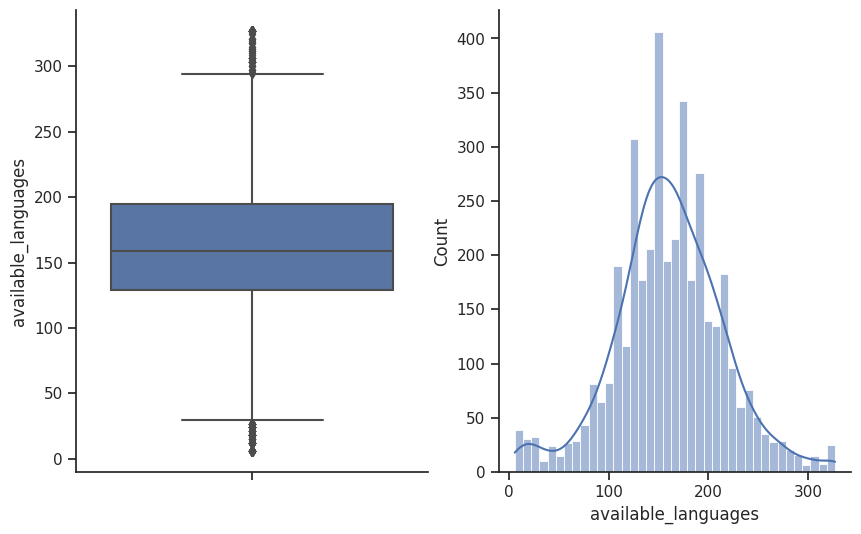

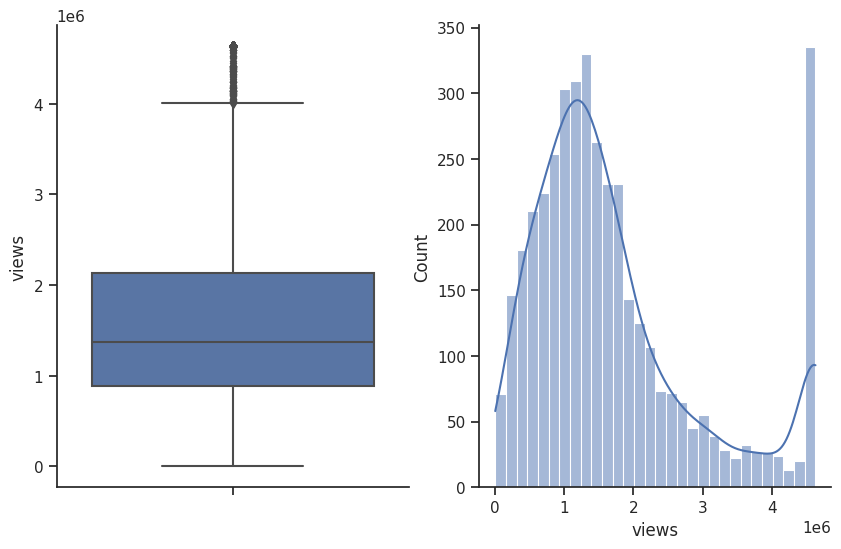

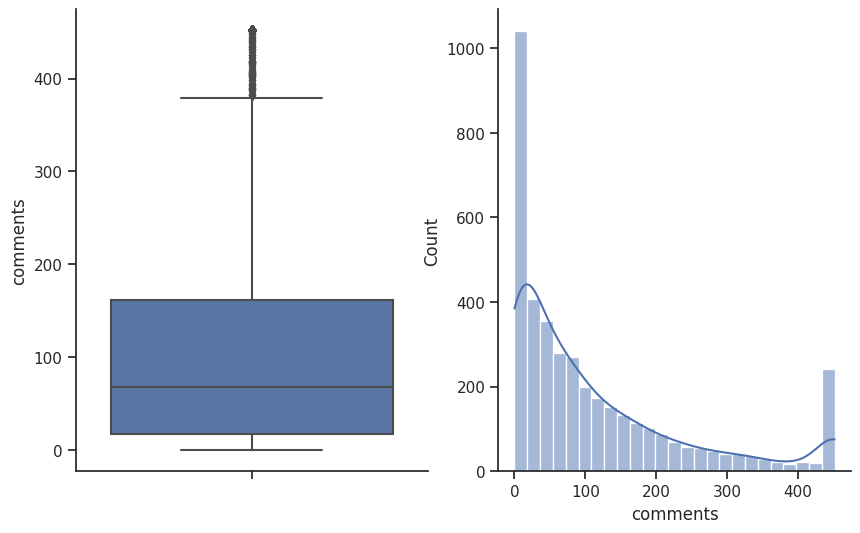

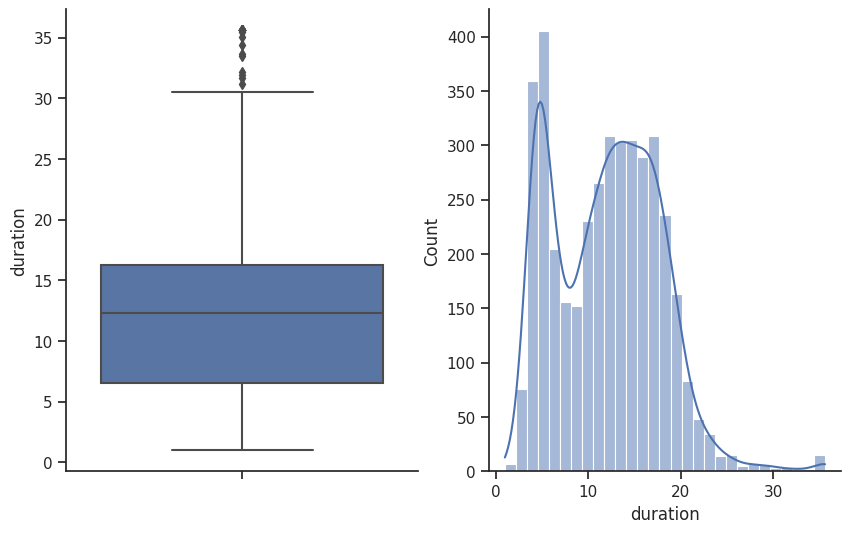

In [ ]:
# Check for outliers
for i in outliers:
  box_hist_plot(df,i)

**Observation**


First we define the function called box_hist_plot so this function basically plot the features on to the box plot and histogram plot help us to  visualization the outliers. We have outliers in 'available_languages','views','comments','duration'. 

We use IQR to removee the outliers. Although function still have outliers but it reduces gratlu compared to earlier. Also we have skewedness in our features we will deal with this problem in data transformation. 

### **Categorical Encoding**

In [ ]:
# Using onehot encoder on TEDEvent   
enc = OneHotEncoder()
ted_event = enc.fit_transform(df.TEDEvents.values.reshape(-1,1)).toarray()

# To add this back into the original dataframe 
df_event = pd.DataFrame(ted_event,columns = enc.get_feature_names_out(['TEDEvents']))

df = pd.concat([df, df_event], axis=1)

# droping the country column 
df = df.drop(['TEDEvents'], axis=1)

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,Popularity_score,talk_score,available_languages,published_year,published_month,published_day,TEDEvents_Other TED,TEDEvents_TED,TEDEvents_TED Residency,TEDEvents_TED-Ed,TEDEvents_TEDGlobal,TEDEvents_TEDSummit,TEDEvents_TEDWomen,TEDEvents_TEDx
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,16.283333,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5,4,270,2006,6,Tuesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",4635192,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",452.0,19.833333,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",5,5,303,2006,6,Tuesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,21.433333,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",3,2,165,2006,6,Tuesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,18.600000,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,4,3,219,2006,6,Tuesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",4635192,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",452.0,19.400000,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,5,5,327,2006,6,Tuesday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Feature Selection**

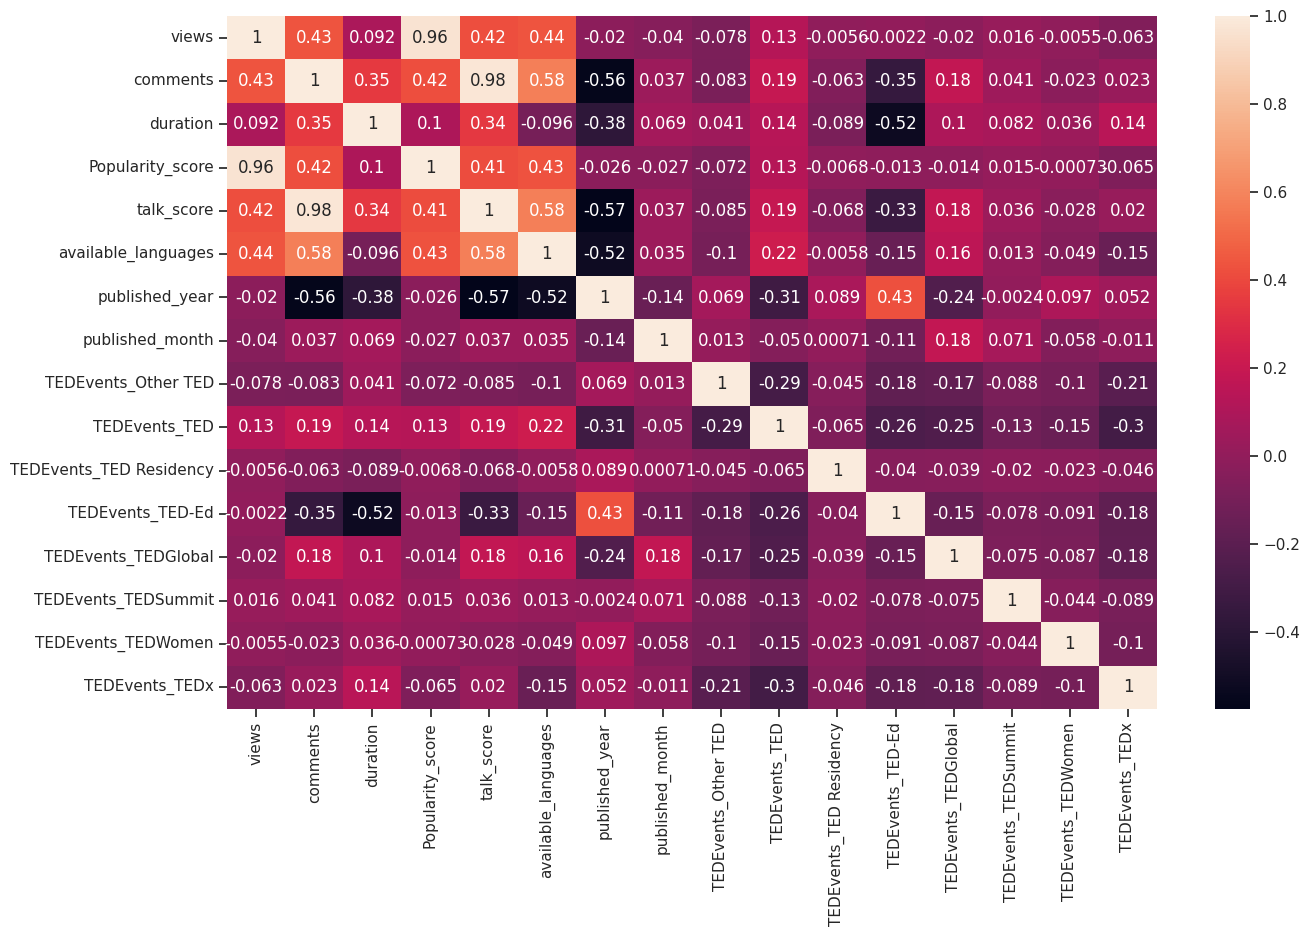

In [ ]:
# Lets Select some features
plt.figure(figsize=(15,9))
columns = [i for i in df.corr() if i not in 'talk_id']
sns.heatmap(df[columns].corr(),annot=True)
plt.show()

In [ ]:
# Definig a function for VIF score 
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# VIF score
feat = [i for i in df.corr().columns if i not in ['views','talk_id']]
calc_vif(df[feat])

,variables,VIF
0,comments,22.158475
1,duration,2.052710
2,Popularity_score,1.660094
3,talk_score,22.116995
4,available_languages,2.708189
5,published_year,2.613760
6,published_month,1.067851
7,TEDEvents_Other TED,113805.783451
8,TEDEvents_TED,197182.121141
9,TEDEvents_TED Residency,6714.616280


In [ ]:
# Removing some columns
features = [i for i in feat if i not in ['talk_score','published_year','published_month','published_day']]
calc_vif(df[features])

,variables,VIF
0,comments,2.136686
1,duration,1.792312
2,Popularity_score,1.371920
3,available_languages,2.081688
4,TEDEvents_Other TED,5.439007
5,TEDEvents_TED,10.233076
6,TEDEvents_TED Residency,1.230069
7,TEDEvents_TED-Ed,3.619135
8,TEDEvents_TEDGlobal,5.045151
9,TEDEvents_TEDSummit,2.119289


In [ ]:
# Droping columns in df
drop_columns = [i for i in df.columns if i not in features]
drop_columns = [i for i in drop_columns if i not in 'views']
for i in drop_columns:
  df = df.drop(i,axis=1)

In [ ]:
df.head(1)

,views,comments,duration,Popularity_score,available_languages,TEDEvents_Other TED,TEDEvents_TED,TEDEvents_TED Residency,TEDEvents_TED-Ed,TEDEvents_TEDGlobal,TEDEvents_TEDSummit,TEDEvents_TEDWomen,TEDEvents_TEDx
0,3523392,272.0,16.283333,5,270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Data Transformation**

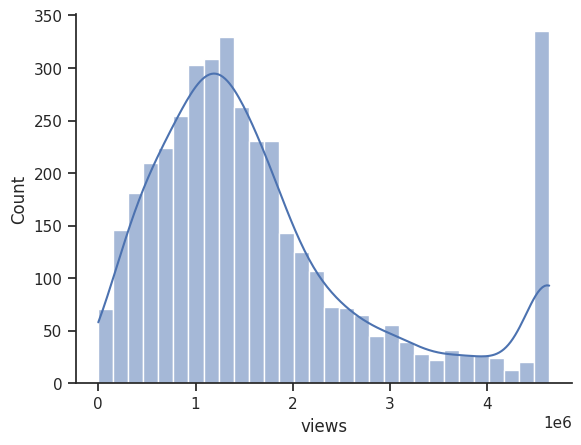

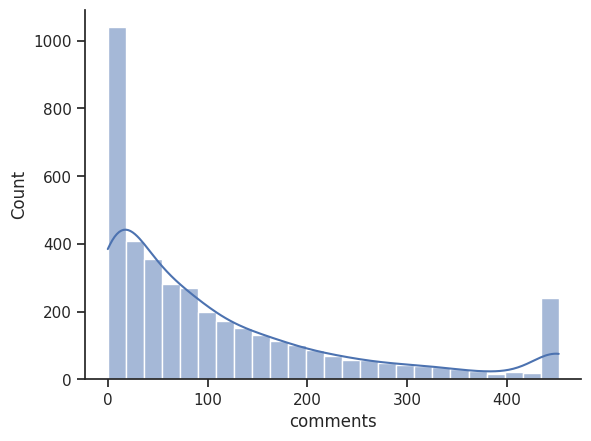

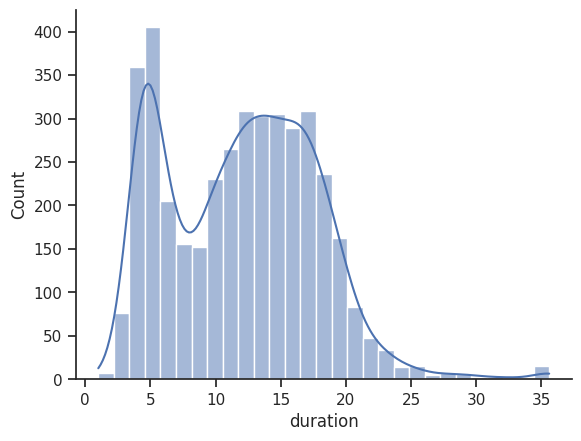

In [ ]:
# Chart
col = ['views','comments','duration']
for i in col:
  sns.histplot(df[i],kde=True)
  plt.show()

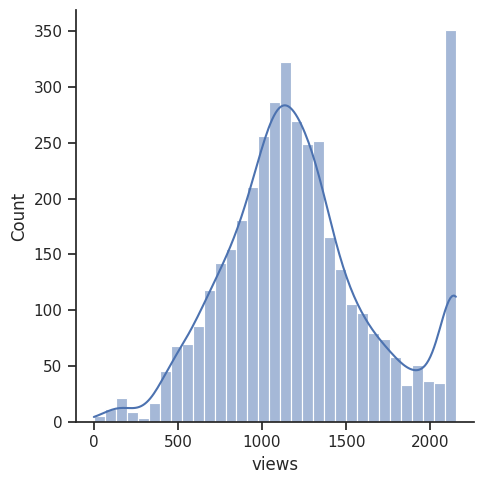

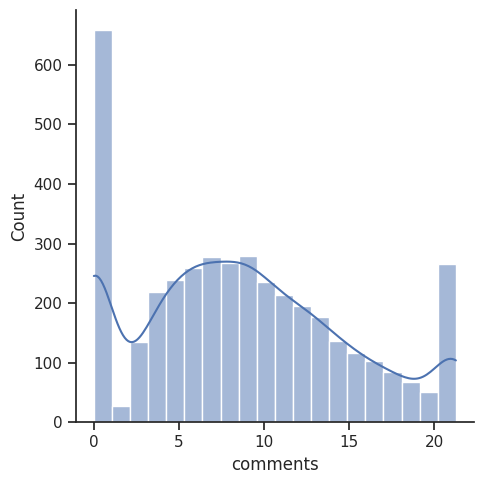

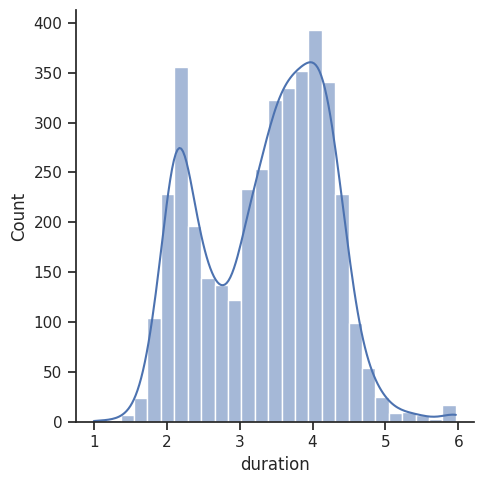

In [ ]:
# Chart
for i in col:
  df[i] = np.sqrt(df[i])
  sns.displot(df[i],kde=True)
  plt.show()   

In [ ]:
df[col].skew()

views       0.375541
comments    0.356119
duration   -0.146715
dtype: float64

### **Data Splitting**

In [ ]:
# Spilitting dataset
X = df.drop(columns=['views'])
y = df['views']

# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Shape of train
print(X_train.shape)
print(X_test.shape)

(2803, 12)
(1202, 12)


In [ ]:
# X - Independnet features
X.head()

,comments,duration,Popularity_score,available_languages,TEDEvents_Other TED,TEDEvents_TED,TEDEvents_TED Residency,TEDEvents_TED-Ed,TEDEvents_TEDGlobal,TEDEvents_TEDSummit,TEDEvents_TEDWomen,TEDEvents_TEDx
0,16.492423,4.035261,5,270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.260292,4.453463,5,303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.135529,4.629615,3,165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.798649,4.312772,4,219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.260292,4.404543,5,327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

## **Models**

### ***Linear Regression***

In [ ]:
# Train Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

# Regression coefficent
print(f"Regression coefficent - {model_lr.coef_}\n")

# Intercept
print(f"Intercept - {model_lr.intercept_}")

# Predicting
y_pred_train = model_lr.predict(X_train)
y_pred = model_lr.predict(X_test)

Regression coefficent - [  -3.0785974    94.79898067 1459.89866481  215.82235431   -7.10440906
   -9.11969223   38.08313654    6.933246    -22.31425166   12.13111327
    7.34446914  -25.95361199]

Intercept - 486.0109511460687


In [ ]:
# Evaluation Metrics
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('--'*15)

print('Training data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))
print('--'*15)

print('Testing data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MAE 95.86849777302872
MSE 14260.83060332676
RMSE 119.41871965201587
------------------------------
Training data R2 and Adjusted R2 Score
R2 score 0.9202070373734591
Adjusted R2 score 0.9198638418352805
------------------------------
Testing data R2 and Adjusted R2 Score
R2 score 0.9319219530001925
Adjusted R2 score 0.9312348743088572


### ***Ridge***

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -16677.608546548403


In [ ]:
# Predict
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_ridge_train = ridge_regressor.predict(X_train)

In [ ]:
# Evaluation Metrics
print('MAE',mean_absolute_error(y_test,y_pred_ridge))
print('MSE',mean_squared_error(y_test,y_pred_ridge))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print('--'*15)

print('Training data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_train,y_pred_ridge_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))
print('--'*15)

print('Testing data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_test,y_pred_ridge))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MAE 95.86968576418231
MSE 14260.917593451899
RMSE 119.41908387461318
------------------------------
Training data R2 and Adjusted R2 Score
R2 score 0.9202070353047936
Adjusted R2 score 0.9198638397577175
------------------------------
Testing data R2 and Adjusted R2 Score
R2 score 0.9319215377286005
Adjusted R2 score 0.9312348743088572


### ***LASSO***

In [ ]:
# Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 30000)
# Predict
lasso.fit(X_train, y_train)
# Score
print(f"lasso score is {lasso.score(X_train, y_train)}")

lasso score is 0.9202070344727049


In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -16665.72079361893


In [ ]:
# Predict
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_tain_lasso = lasso_regressor.predict(X_train)

In [ ]:
# Evaluation Metrics
print('MAE',mean_absolute_error(y_test,y_pred_lasso))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print('--'*15)

print('Training data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_train,y_pred_tain_lasso))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_tain_lasso))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))
print('--'*15)

print('Testing data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_test,y_pred_lasso))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MAE 95.82824058781623
MSE 14260.83060332676
RMSE 119.39428408483695
------------------------------
Training data R2 and Adjusted R2 Score
R2 score 0.920186639159249
Adjusted R2 score 0.9198433558868157
------------------------------
Testing data R2 and Adjusted R2 Score
R2 score 0.9319498105337459
Adjusted R2 score 0.931263012994978


### ***Decision Tree***

In [ ]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Print the score
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

# Predict
y_pred_train_dt = dtr.predict(X_train)
y_test_pred_dt = dtr.predict(X_test)

0.9997662709001355
0.8764165515081165


***HYPERPRAMETER***

In [ ]:
# Hyper pramater
tree = DecisionTreeRegressor()

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

# best hyperparameters 
tuning_model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-201969.498 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-214797.848 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-203637.979 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-201969.498 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-215154.515 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weig

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best model score and best prametrs
print(tuning_model.best_params_)
print(tuning_model.best_score_)

{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}
-22178.419570853894


In [ ]:
# Fitting the model to the best prameters
tuned_hyper_model = DecisionTreeRegressor(max_depth=9,max_features=None,
                                          max_leaf_nodes=30,min_samples_leaf=4,
                                          min_weight_fraction_leaf=0.1,
                                          splitter='random')
# Fitting the model
tuned_hyper_model.fit(X_train,y_train)

# prediction 
tuned_pred= tuned_hyper_model.predict(X_test)
tuned_pred_train = tuned_hyper_model.predict(X_train)

In [ ]:
# Evaluation Metrics
print('MAE',mean_absolute_error(y_test,tuned_pred))
print('MSE',mean_squared_error(y_test,tuned_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,tuned_pred)))
print('--'*15)

print('Training data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_train,tuned_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,tuned_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))
print('--'*15)

print('Testing data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_test,tuned_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,tuned_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MAE 123.59707468814365
MSE 21784.349016150685
RMSE 147.59522016701857
------------------------------
Training data R2 and Adjusted R2 Score
R2 score 0.887994683730857
Adjusted R2 score 0.8875129404350757
------------------------------
Testing data R2 and Adjusted R2 Score
R2 score 0.8960063423068954
Adjusted R2 score 0.8949567847860229


### ***Gradient Boosting Regressor***

In [ ]:
# Import Random Forest
from sklearn.ensemble import GradientBoostingRegressor

grid = dict()
grid['n_estimators'] = [1, 3, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 100]
grid['max_depth'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Fitting the model
grid_search_gb = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search_gb.fit(X_train , y_train)
print(grid_result.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [ ]:
# Predict
y_pred_gbr_train = grid_result.predict(X_train)
y_pred_gbr = grid_result.predict(X_test)

In [ ]:
# Evaluation Metrics
print('MAE',mean_absolute_error(y_test,y_pred_gbr))
print('MSE',mean_squared_error(y_test,y_pred_gbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print('--'*15)

print('Training data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_train,y_pred_gbr_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_gbr_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))
print('--'*15)

print('Testing data R2 and Adjusted R2 Score')
print('R2 score',r2_score(y_test,y_pred_gbr))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred_gbr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MAE 92.95550561415126
MSE 12877.25076358148
RMSE 113.47797479503006
------------------------------
Training data R2 and Adjusted R2 Score
R2 score 0.942386225627924
Adjusted R2 score 0.942138424447829
------------------------------
Testing data R2 and Adjusted R2 Score
R2 score 0.9385268567381412
Adjusted R2 score 0.9379064381349937


# **Conclusion**

TED Talks have become a go-to source of inspiration, education, and knowledge for millions of people worldwide. The platform has given a voice to a diverse range of speakers, We had a dataset of over 4000 TED Events, and the main objective was to build a model for views generated for these events.

According to our Data Alex Gendler stands out as the most popular, with the most views to his credit. However, the most viewed TED Talk of all time is Sir Ken Robinson's "Do Schools Kill Creativity?" which has received over 65 million views

Even though the Dataset was feature rich, it had many outliers and we tried to solve that problem using the IQR method.
When it comes to evaluating the performance of regression methods used, the Mean Absolute Error (MAE) was found to be a more suitable metric than Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) as these latter metrics heavily penalize outliers and we decided to modify the outliers instead of removing them completely

Lasso and Gradient Boost showed relatively good results for both train and test MAE. Decision Tree showed overfitting issues, After Hyperprameter the it doesn't show overfitting but however it gives unstasfactory result.

According to the findings, Gradient Boost producing the best result.